##### Loan Application Status

###### Import Libraries

In [329]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

%matplotlib inline
from sklearn import metrics
from sklearn.metrics import make_scorer
import warnings
warnings.filterwarnings('ignore')

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier,RandomForestClassifier,AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score,roc_curve,auc, roc_auc_score
from sklearn.model_selection import RandomizedSearchCV, cross_val_score

from sklearn.metrics import precision_score, recall_score, precision_recall_fscore_support
from sklearn.metrics import f1_score,precision_recall_curve



###### Load Dataset

In [330]:
pd.pandas.set_option('display.max_columns',None)
df=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/DSData/master/loan_prediction.csv')

###### Dimension of Dataset

In [331]:
df.shape

(614, 13)

*Observation :*<br>*In Dataset there are 614 rows and 13 columns*

###### Sample of Dataset

In [332]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


###### Breif about Dataset

In [333]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


*Observation :*<br>*In Dataset there are 4 float type columns 1 int type column and 8 object type columns*<br>
*All columns do not have 614 non null values so there are missing values in the dataset*

###### Statistical Summary of Data

###### ---for numerical variable

In [334]:
df.describe(exclude='object')

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


###### ---for categorical variable

In [335]:
df.describe(include=[object]) 

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
count,614,601,611,599,614,582,614,614
unique,614,2,2,4,2,2,3,2
top,LP001157,Male,Yes,0,Graduate,No,Semiurban,Y
freq,1,489,398,345,480,500,233,422


*Observation :*<br>*Total count for all columns should be 614 but in the statistical summary for*
<br> *both categorical and numerical some columns not have count 614 so those columns have missing values*
<br>*In some columns max and min values have big difference so there are outliers.*<br>*In some columns all quartlies values are same.*

###### check for unique values in columns

In [336]:
df.nunique()

Loan_ID              614
Gender                 2
Married                2
Dependents             4
Education              2
Self_Employed          2
ApplicantIncome      505
CoapplicantIncome    287
LoanAmount           203
Loan_Amount_Term      10
Credit_History         2
Property_Area          3
Loan_Status            2
dtype: int64

*Observation :*<br>*Loan_id, ApplicantIncome,CoapplicantIncome,LoanAmount columns have move than 20 unnique values.*<br>*so they are countinues values*<br>
*and rest have less than 20 unique value so they are categorical columns*

###### check for missing values in columns

In [337]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [338]:
print("Total missing values :",df.isnull().sum().sum())

Total missing values : 149


*Observation :*<br>*All columns have missing values except columns*
<br>*Loan_Id,Education,ApplicantIncome,CoapplicantIncome,Property_Area and Loan_Status*
<br>*Total missing values in dataset are 149.*

###### total % missing values in columns

In [339]:
print("Total % of MIssing Values in Columns :")
df.isnull().sum()/df.shape[0]*100 

Total % of MIssing Values in Columns :


Loan_ID              0.000000
Gender               2.117264
Married              0.488599
Dependents           2.442997
Education            0.000000
Self_Employed        5.211726
ApplicantIncome      0.000000
CoapplicantIncome    0.000000
LoanAmount           3.583062
Loan_Amount_Term     2.280130
Credit_History       8.143322
Property_Area        0.000000
Loan_Status          0.000000
dtype: float64

*Observation :*<br>*Gender,Dependents,Self_Employed,LoanAmount,Loan_Amount_Term columns have less than 6% data missing*
<br>*Credit_History column have 8% data missing*

###### check for duplicate rows

In [340]:
sum(df.duplicated())

0

*Observation :*<br>*No duplicate rows*

###### check for zeros in columns

In [341]:
print(df[df==0].count())
print('Total zeros in Dataset:', df[df==0].count().sum())

Loan_ID                0
Gender                 0
Married                0
Dependents             0
Education              0
Self_Employed          0
ApplicantIncome        0
CoapplicantIncome    273
LoanAmount             0
Loan_Amount_Term       0
Credit_History        89
Property_Area          0
Loan_Status            0
dtype: int64
Total zeros in Dataset: 362


*Observation :*<br>*CoapplicantIncome and Credit_History column have zero values.*

###### total % of zeros in columns

In [342]:
print("Total % of Zeros as Value in Columns")
df[df==0].count()/df.shape[0]*100   

Total % of Zeros as Value in Columns


Loan_ID               0.000000
Gender                0.000000
Married               0.000000
Dependents            0.000000
Education             0.000000
Self_Employed         0.000000
ApplicantIncome       0.000000
CoapplicantIncome    44.462541
LoanAmount            0.000000
Loan_Amount_Term      0.000000
Credit_History       14.495114
Property_Area         0.000000
Loan_Status           0.000000
dtype: float64

*Observation :*<br>*CoapplicantIncome column have 44% and Credit_History column have 14% zero values*

###### Identification of numbers

###### check for numerical variables

In [343]:
numerical_features = [feature for feature in df.columns if df[feature].dtypes != 'O']
print('Number of numerical variables: ', len(numerical_features))

Number of numerical variables:  5


In [344]:
for feature in numerical_features:
    print('The feature is {} and number of numerical are {}'.format(feature,len(df[feature].unique())))

The feature is ApplicantIncome and number of numerical are 505
The feature is CoapplicantIncome and number of numerical are 287
The feature is LoanAmount and number of numerical are 204
The feature is Loan_Amount_Term and number of numerical are 11
The feature is Credit_History and number of numerical are 3


In [345]:
df[numerical_features].head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,5849,0.0,NaN,360.0,1.0
1,4583,1508.0,128.0,360.0,1.0
2,3000,0.0,66.0,360.0,1.0
3,2583,2358.0,120.0,360.0,1.0
4,6000,0.0,141.0,360.0,1.0


###### ---check for descrete variable

In [346]:
descrete_feature=[feature for feature in numerical_features if len(df[feature].unique())<25]
print("Descrete Variables Count: {}".format(len(descrete_feature)),"\n")

for feature in descrete_feature:
    print('The feature is {} and number of numerical are {}'.format(feature,len(df[feature].unique())))
    
    
for feature in descrete_feature:
    print("\n",feature," : ", df[feature].unique())

Descrete Variables Count: 2 

The feature is Loan_Amount_Term and number of numerical are 11
The feature is Credit_History and number of numerical are 3

 Loan_Amount_Term  :  [360. 120. 240.  nan 180.  60. 300. 480.  36.  84.  12.]

 Credit_History  :  [ 1.  0. nan]


In [347]:
df[descrete_feature].head()

,Loan_Amount_Term,Credit_History
0,360.0,1.0
1,360.0,1.0
2,360.0,1.0
3,360.0,1.0
4,360.0,1.0


###### ---check for countinuous variable

In [348]:
continuous_feature=[feature for feature in numerical_features if feature not in descrete_feature ]
print("Continuous Variables Count {}".format(len(continuous_feature)),"\n")

for feature in continuous_feature:
    print('The feature is:  {}     and number of numerical are:  {}'.format(feature,len(df[feature].unique())))

Continuous Variables Count 3 

The feature is:  ApplicantIncome     and number of numerical are:  505
The feature is:  CoapplicantIncome     and number of numerical are:  287
The feature is:  LoanAmount     and number of numerical are:  204


In [349]:
df[continuous_feature].head()

,ApplicantIncome,CoapplicantIncome,LoanAmount
0,5849,0.0,NaN
1,4583,1508.0,128.0
2,3000,0.0,66.0
3,2583,2358.0,120.0
4,6000,0.0,141.0


*Observation :*<br>*ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History columns are Numerical variables*<br>*ApplicantIncome,CoapplicantIncome,LoanAmount are countinuous features and Loan_Amount_Term,Credit_History are discrete features*

###### check for categorical variable

In [350]:
categorical_features=[feature for feature in df.columns if df[feature].dtypes=='O']
print('Number of Categorical variables: ', len(categorical_features))

Number of Categorical variables:  8


In [351]:
for feature in categorical_features:
    print('The feature is {} and number of categories are {}'.format(feature,len(df[feature].unique())))

The feature is Loan_ID and number of categories are 614
The feature is Gender and number of categories are 3
The feature is Married and number of categories are 3
The feature is Dependents and number of categories are 5
The feature is Education and number of categories are 2
The feature is Self_Employed and number of categories are 3
The feature is Property_Area and number of categories are 3
The feature is Loan_Status and number of categories are 2


In [352]:
df[categorical_features].head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,Urban,Y
4,LP001008,Male,No,0,Graduate,No,Urban,Y


###### ---check for binary variable

In [353]:
binary_feature=[feature for feature in categorical_features if len(df[feature].unique())==2 or len(df[feature].unique())<2 and feature not in date_feature]
print("Binary Variables Count: {}".format(len(binary_feature)))

Binary Variables Count: 2


In [354]:
for feature in binary_feature:
    print(feature," : ", df[feature].unique())

Education  :  ['Graduate' 'Not Graduate']
Loan_Status  :  ['Y' 'N']


In [355]:
df[binary_feature].head()

,Education,Loan_Status
0,Graduate,Y
1,Graduate,N
2,Graduate,Y
3,Not Graduate,Y
4,Graduate,Y


###### ---check for nominal variable

In [356]:
nominal_feature=[feature for feature in categorical_features if feature not in binary_feature]
print("Nominal feature Count {}".format(len(nominal_feature)))

Nominal feature Count 6


In [357]:
for feature in nominal_feature:
    print('The feature is {} and number of numerical are {}'.format(feature,len(df[feature].unique())))

The feature is Loan_ID and number of numerical are 614
The feature is Gender and number of numerical are 3
The feature is Married and number of numerical are 3
The feature is Dependents and number of numerical are 5
The feature is Self_Employed and number of numerical are 3
The feature is Property_Area and number of numerical are 3


In [358]:
nominalfeature=['Gender','Married','Dependents','Self_Employed','Property_Area']
for feature in nominalfeature :
    print(feature," : ", df[feature].unique())

Gender  :  ['Male' 'Female' nan]
Married  :  ['No' 'Yes' nan]
Dependents  :  ['0' '1' '2' '3+' nan]
Self_Employed  :  ['No' 'Yes' nan]
Property_Area  :  ['Urban' 'Rural' 'Semiurban']


In [359]:
df[nominal_feature].head()

,Loan_ID,Gender,Married,Dependents,Self_Employed,Property_Area
0,LP001002,Male,No,0,No,Urban
1,LP001003,Male,Yes,1,No,Rural
2,LP001005,Male,Yes,0,Yes,Urban
3,LP001006,Male,Yes,0,No,Urban
4,LP001008,Male,No,0,No,Urban


*Observation :*<br>*Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status are categorical variables*<br>*Loan_ID	Gender	Married	DependentsSelf_Employed	Property_Area are nominal features and Education,Loan_Status are binary features*

###### check for cardinality

###### ---for categorical variables

Text(0.5, 1.0, 'Cardinality')

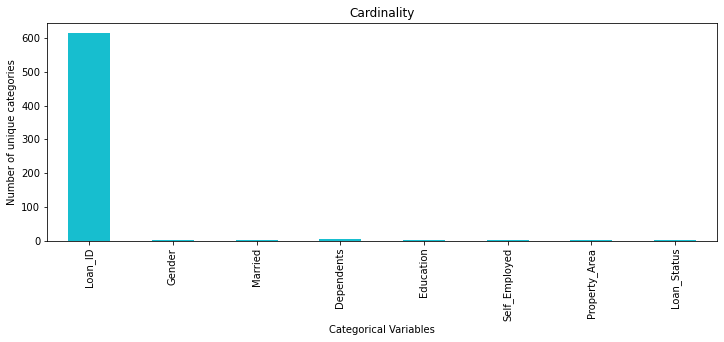

In [360]:
df[categorical_features].nunique().plot.bar(figsize=(12,4),color='#17becf')
plt.ylabel('Number of unique categories')
plt.xlabel('Categorical Variables')
plt.title('Cardinality')

*Observation :*<br>*All columns have low cardinality Except Loan_ID*

###### check for outliers 

###### ---for numerical variables

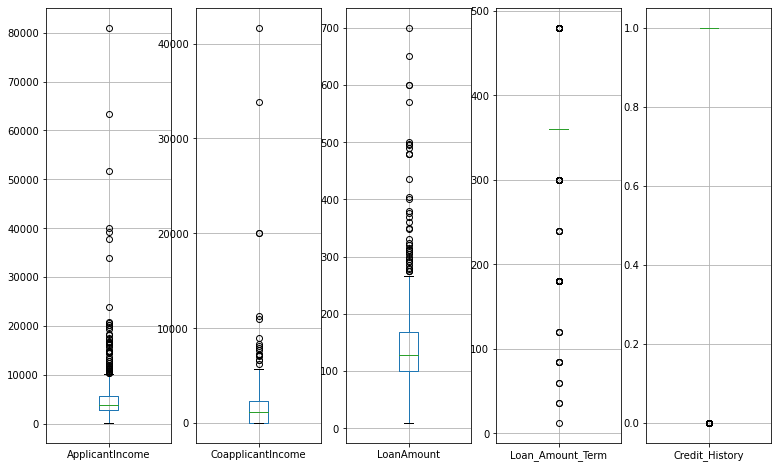

In [361]:
fig, pltcan=plt.subplots(nrows=1, ncols=len(numerical_features), figsize=(13,8))
for predcol , i in zip(numerical_features, range(len(numerical_features))):
    df.boxplot(column=predcol, figsize=(2,10), vert=True, ax=pltcan[i])

*Observation :*<br>*Loan_Amount_Term and Credit_History have unique values 11 an 2 respectively, so can not count as outiler.*<br>*ApplicantIncome,CoapplicantINcome and LoanAmount have outliers*

###### check for skewness

ApplicantIncome      6.539513
CoapplicantIncome    7.491531
LoanAmount           2.677552
Loan_Amount_Term    -2.362414
Credit_History      -1.882361
dtype: float64


<AxesSubplot:>

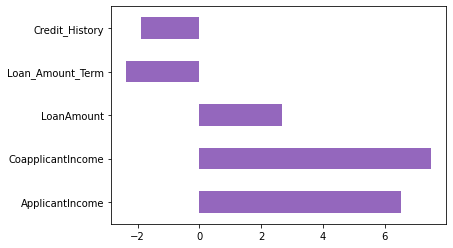

In [362]:
print(df.skew())
df.skew().plot(kind='barh',color='#9467bd')

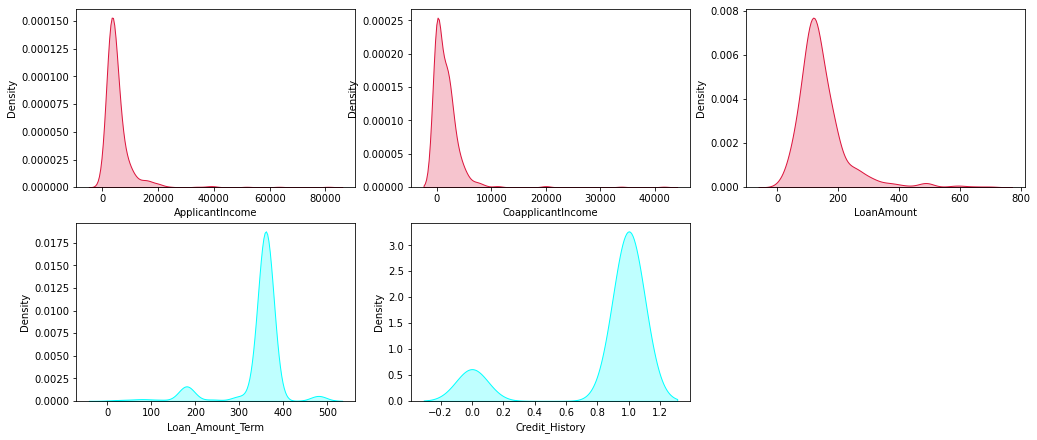

In [363]:
#Visualization of Skewness (numerical variable)
plt.figure(figsize=(17,19))
plt.subplot(5,3,1)
sns.kdeplot(df['ApplicantIncome'],color='crimson',shade=True)
plt.subplot(5,3,2)
sns.kdeplot(df['CoapplicantIncome'],color='crimson',shade=True)
plt.subplot(5,3,3)
sns.kdeplot(df['LoanAmount'],color='crimson',shade=True)
plt.subplot(5,3,4)
sns.kdeplot(df['Loan_Amount_Term'],color='aqua',shade=True)
plt.subplot(5,3,5)
sns.kdeplot(df['Credit_History'],color='aqua',shade=True)

plt.show()


*Observation :*<br>*ApplicantIncome, CoapplicantIncome,LoanAmount have light right skewness*<br>*Loan_Amount_Term,Credit_History have left skewness*

###### Identify Target and Feature Variable

*Prediction-*<br>*Loan_Status (Approve or Reject)*

*Targe Variable (Depaendent Features)* <br>            *-Loan_Status* <br>
*Predictors (Independent Features)*<br>                 *- All variables* 

###### Univariate Analysis

###### 1. Loan_Status variable

<AxesSubplot:ylabel='Loan_Status'>

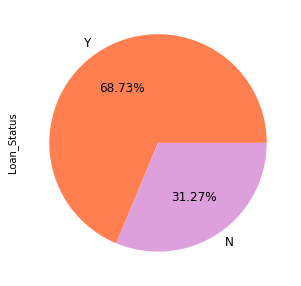

In [364]:
df['Loan_Status'].value_counts().plot(kind = "pie",autopct='%1.2f%%',fontsize=12,figsize=(5,5),colors = ['coral','plum'])

*Observation :*<br>*68% people have taken loan*<br>*31% have no loan amount*

###### 2. Loan_ID, LoanAmount, Loan_Amount_Term variable

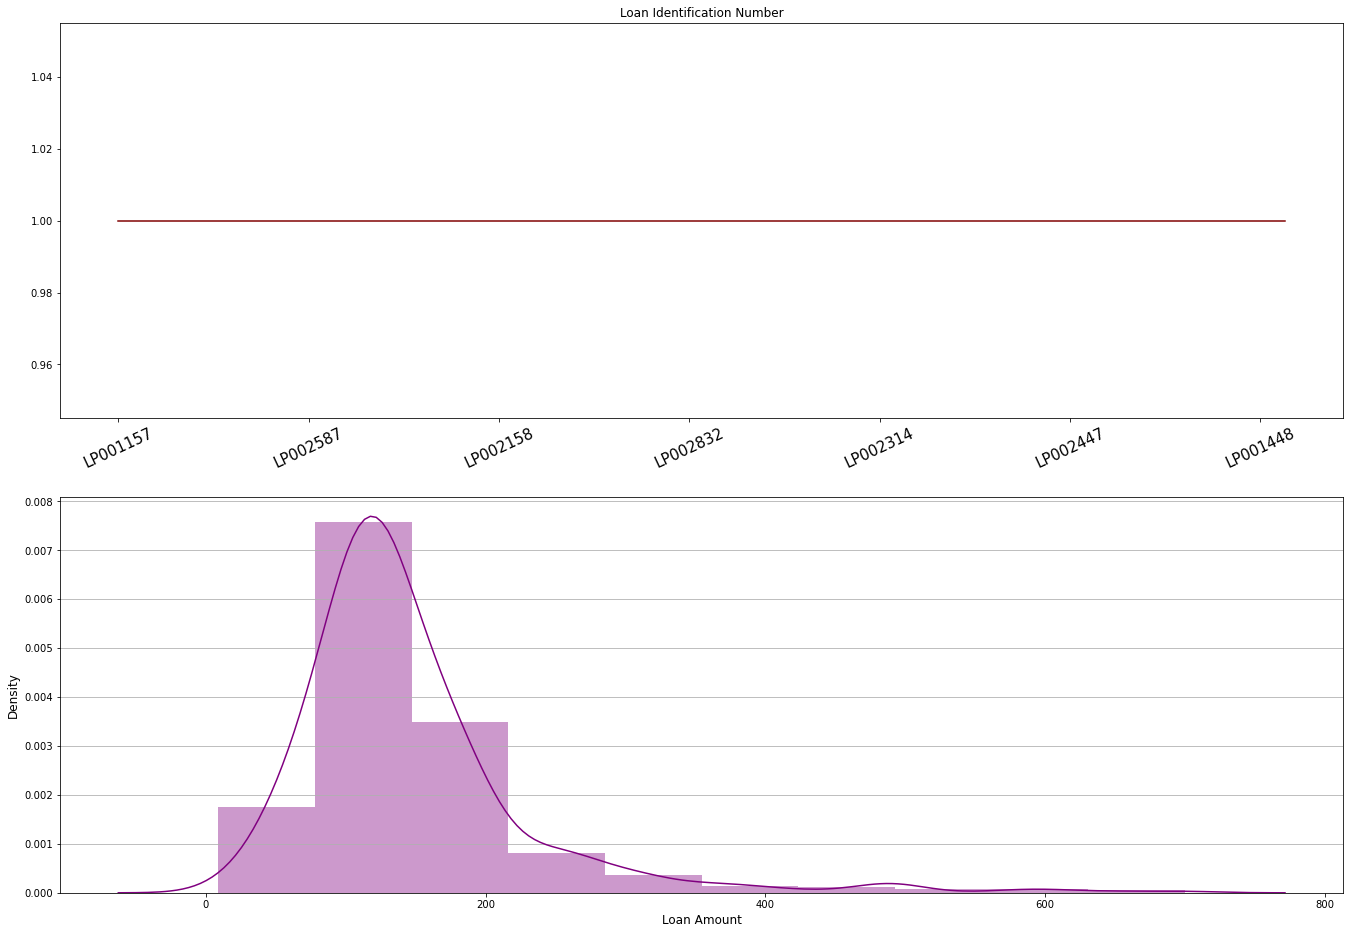

In [365]:
plt.figure(figsize=(15,15))
plt.subplot(211)
df['Loan_ID'].value_counts().plot(kind='line', title='Loan Identification Number', figsize=(23,16),color='maroon')
plt.xticks(rotation=25,fontsize=15)
plt.subplot(212)
sns.distplot(df['LoanAmount'],hist = True, bins=10, kde=True, color='purple')
plt.xlabel('Loan Amount', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.grid(axis='y')

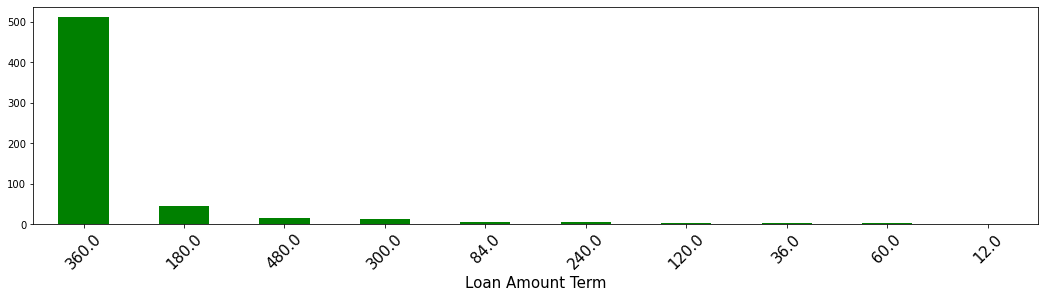

In [366]:
df['Loan_Amount_Term'].value_counts().plot(kind='bar', figsize=(18,4),color='green')
plt.xticks(rotation=45, fontsize=15)
plt.xlabel('Loan Amount Term', fontsize=15)
plt.show()

*Observation :*<br>*Loan ID is unique*<br>*max people have taken loan amount in the range of 50 to 150*
<br>*Loan amount term is the highest on 360*

###### 3. ApplicantIncome, CoapplicantIncome variable

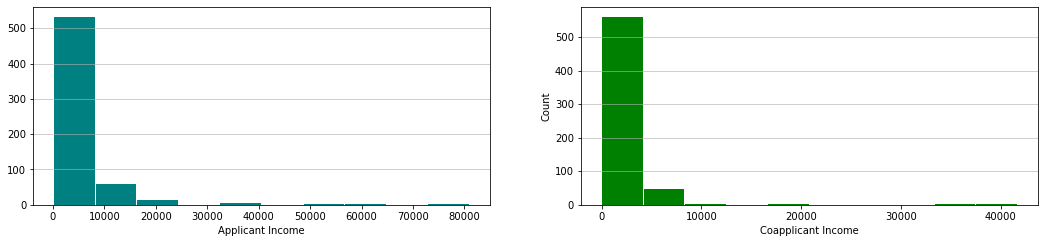

In [367]:
plt.figure(figsize=(18,8))
plt.subplot(2,2,1)
plt.hist(df['ApplicantIncome'], rwidth = 0.98,color='teal')
plt.xlabel('Applicant Income', fontsize=10)
plt.grid(axis='y', alpha=0.75)
plt.subplot(2,2,2)
plt.hist(df['CoapplicantIncome'], rwidth = 0.98,color='green')
plt.xlabel('Coapplicant Income', fontsize=10)
plt.ylabel('Count', fontsize=10)
plt.grid(axis='y', alpha=0.75)

*Observation :*<br>*max applicant income is in the range from 0 to 10000*<br>*max coapplicant income is in the range between 0 to 5000*

###### 4. Gender, Married, Education, Dependents, Self_Employed, Property_Area, Credit_History variable

<AxesSubplot:ylabel='Credit_History'>

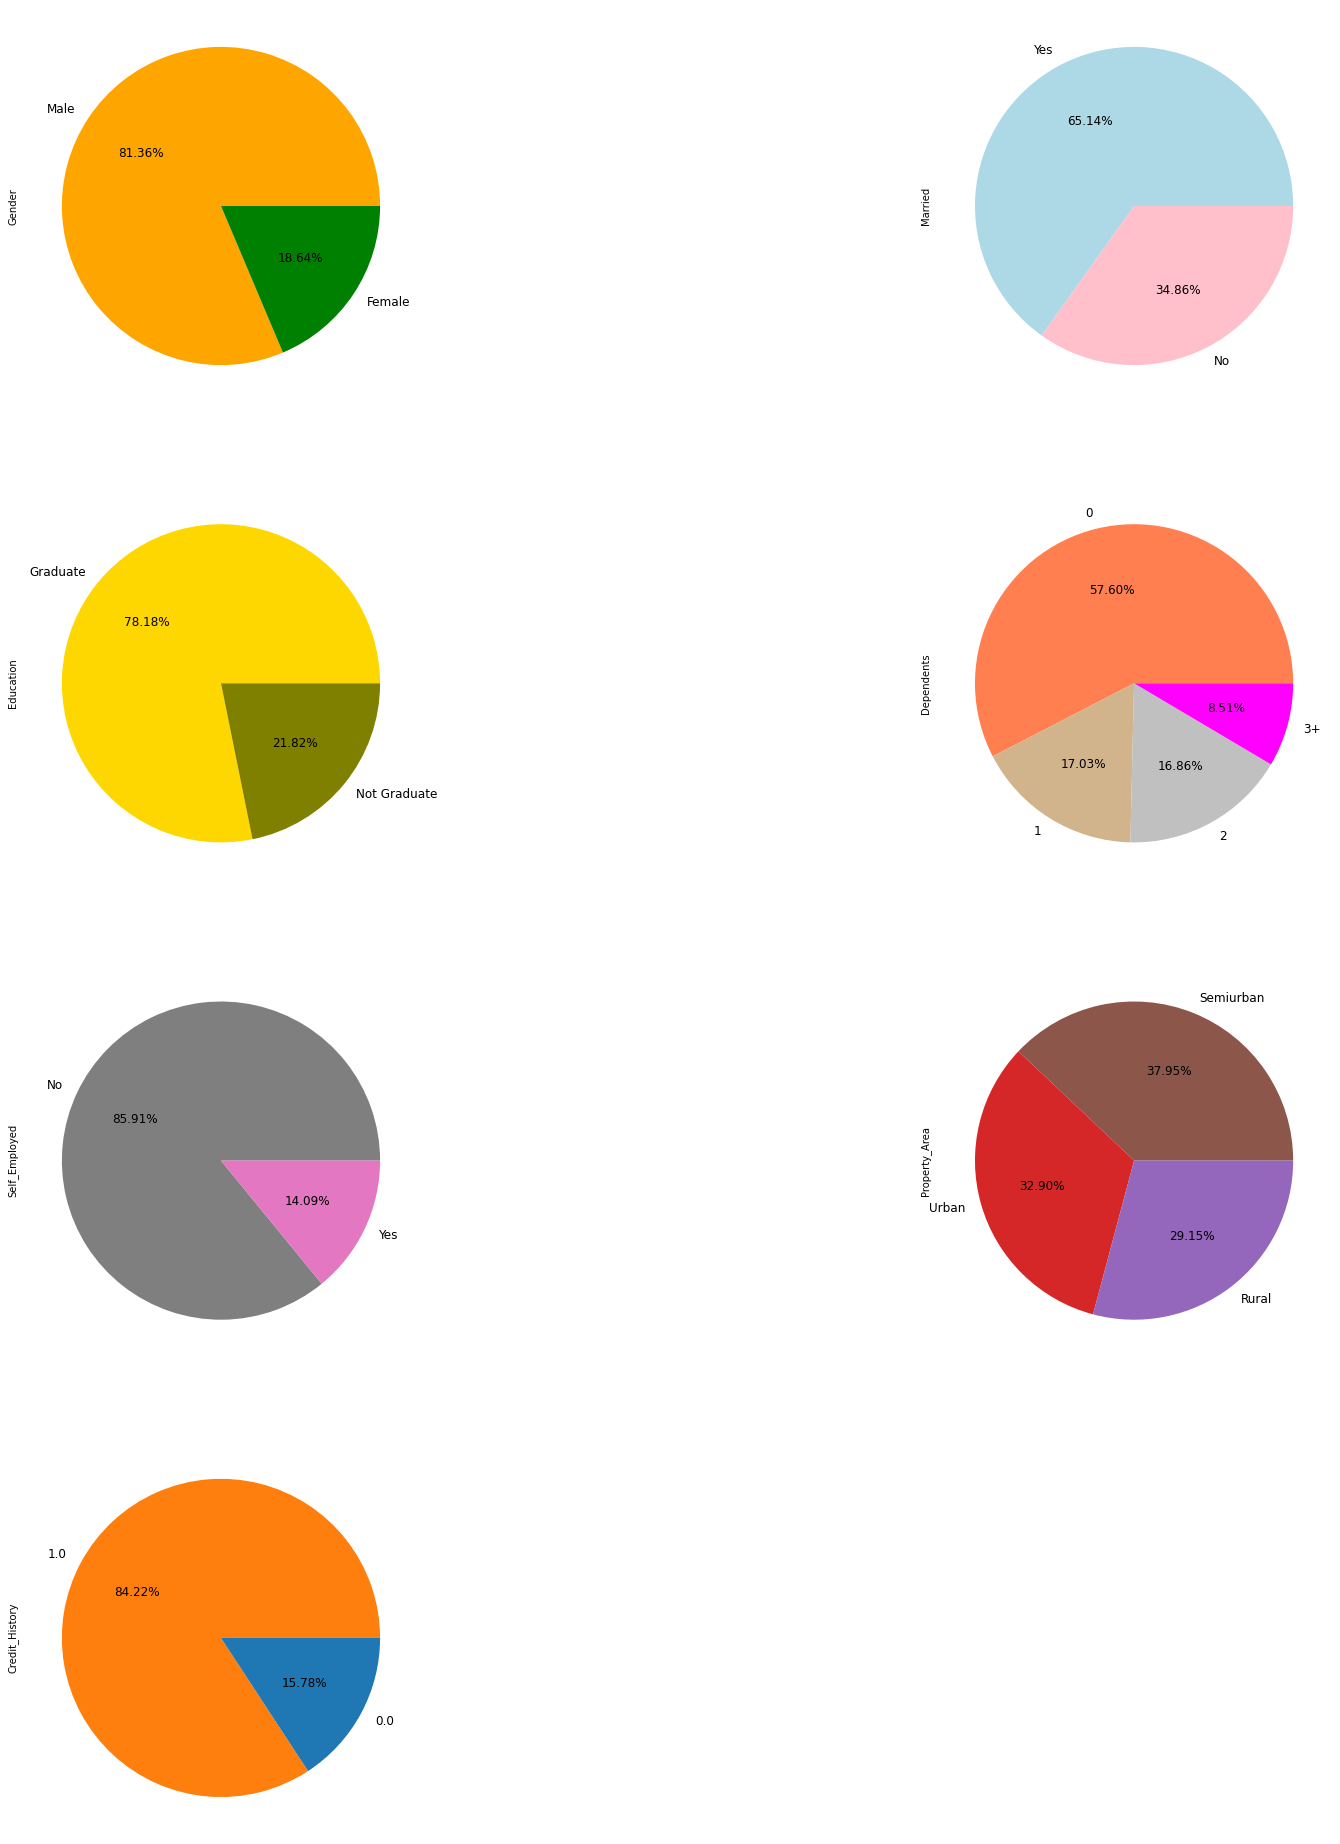

In [368]:
plt.subplot(721)
df['Gender'].value_counts().plot(kind = "pie",autopct='%1.2f%%',fontsize=12,figsize=(30,60),colors = ['orange', 'green'])
plt.subplot(722)
df['Married'].value_counts().plot(kind = "pie",autopct='%1.2f%%',fontsize=12,figsize=(30,60),colors = ['lightblue', 'pink'])
plt.subplot(723)
df['Education'].value_counts().plot(kind = "pie",autopct='%1.2f%%',fontsize=12,figsize=(30,60),colors = ['gold', 'olive'])
plt.subplot(724)
df['Dependents'].value_counts().plot(kind = "pie",autopct='%1.2f%%',fontsize=12,figsize=(30,60),colors = ['coral', 'tan','silver','magenta'])
plt.subplot(725)
df['Self_Employed'].value_counts().plot(kind = "pie",autopct='%1.2f%%',fontsize=12,figsize=(30,60),colors = ['#7f7f7f','#e377c2'])
plt.subplot(726)
df['Property_Area'].value_counts().plot(kind = "pie",autopct='%1.2f%%',fontsize=12,figsize=(30,60),colors = ['#8c564b', '#d62728','#9467bd'])
plt.subplot(727)
df['Credit_History'].value_counts().plot(kind = "pie",autopct='%1.2f%%',fontsize=12,figsize=(30,60),colors = ['#ff7f0e', '#1f77b4'])

*Observation :*<br>*Max no of male has taken loan they are 81% only 18% female has taken loan*<br>*65% loan applicant are married.*
<br>*78% loan applicant are graduate.*<br>*57% loan application have no dependencies*<br>*85% of loan applicant are self employeed.*
<br>*loan applicant have property in rural,urban and semiurban area and semiurban area property are 37%*<br>*84% applicant have credit history*

###### Bivariate Analysis

###### 1.Categorical Vs Numerical

###### Loan Status
            Vs ApplicantIncome
            Vs CoapplicantIncome
            Vs LoanAmount
            Vs Loan Amount Term
            Vs Credit History

Text(0, 0.5, 'Credit_History')

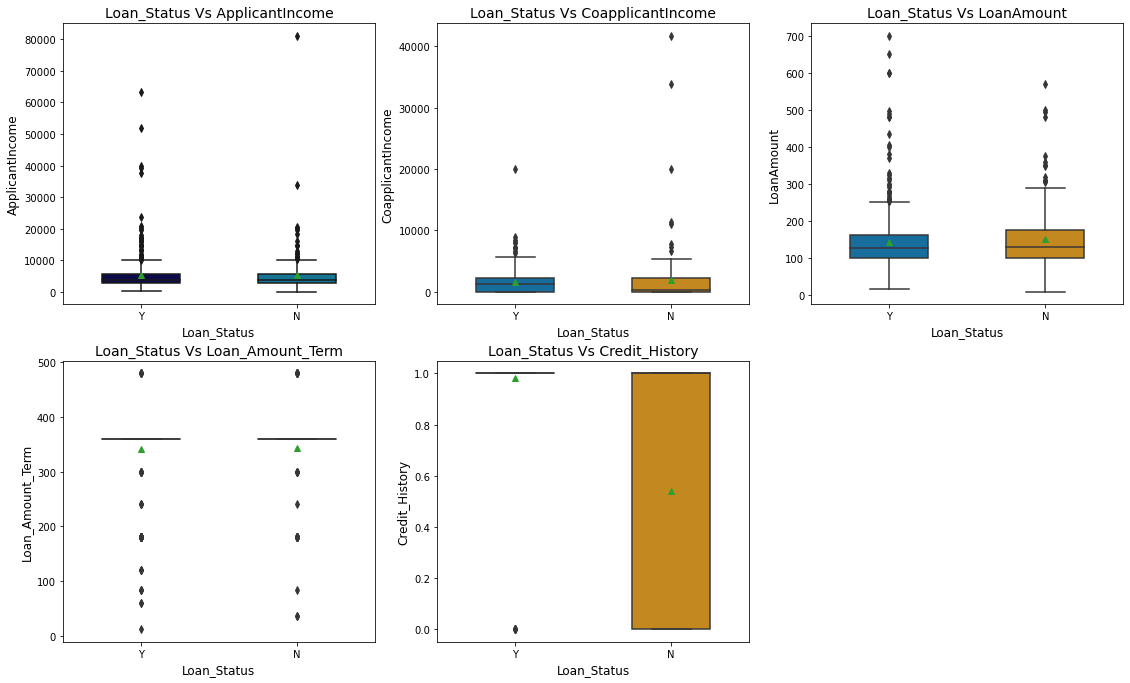

In [369]:
plt.figure(figsize=(19,30))
plt.subplot(5,3,1)
boxplot = sns.boxplot(x ='Loan_Status',y='ApplicantIncome',data=df,showmeans=True,width=0.5,palette="ocean")
plt.title("Loan_Status Vs ApplicantIncome", fontsize=14)
plt.xlabel('Loan_Status', fontsize=12)
plt.ylabel('ApplicantIncome', fontsize=12)
plt.subplot(5,3,2)
boxplot = sns.boxplot(x ='Loan_Status',y='CoapplicantIncome',data=df,showmeans=True,width=0.5,palette="colorblind")
plt.title("Loan_Status Vs CoapplicantIncome", fontsize=14)
plt.xlabel('Loan_Status', fontsize=12)
plt.ylabel('CoapplicantIncome', fontsize=12)
plt.subplot(5,3,3)
boxplot = sns.boxplot(x ='Loan_Status',y='LoanAmount',data=df,showmeans=True,width=0.5,palette="colorblind")
plt.title("Loan_Status Vs LoanAmount", fontsize=14)
plt.xlabel('Loan_Status', fontsize=12)
plt.ylabel('LoanAmount', fontsize=12)
plt.subplot(5,3,4)
boxplot = sns.boxplot(x ='Loan_Status',y='Loan_Amount_Term',data=df,showmeans=True,width=0.5,palette="colorblind")
plt.title("Loan_Status Vs Loan_Amount_Term", fontsize=14)
plt.xlabel('Loan_Status', fontsize=12)
plt.ylabel('Loan_Amount_Term', fontsize=12)
plt.subplot(5,3,5)
boxplot = sns.boxplot(x ='Loan_Status',y='Credit_History',data=df,showmeans=True,width=0.5,palette="colorblind")
plt.title("Loan_Status Vs Credit_History", fontsize=14)
plt.xlabel('Loan_Status', fontsize=12)
plt.ylabel('Credit_History', fontsize=12)

*Observation :*<br>*ApplicantIncome have approx same count of Loan Status*
<br>*cpapplicantIncome have loan_status count yes more than Loan_Status NO*
<br>*LoanAmount which is less have more approval than large Loan Amount*
<br*Loan_Amount_Term is same with both the approved and rejected Loan Status*
<br>*All Loan_Status are No with Credit_History*

###### 2.Both Categorical

###### Loan_Status
            Vs Gender
            Vs Married
            Vs Departments
            Vs Education
            Vs Self_Employed
            Vs Property_Area

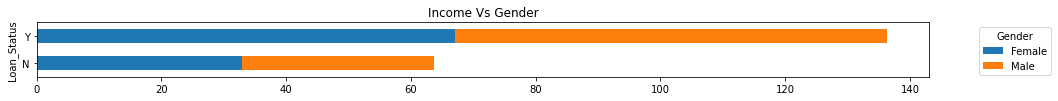

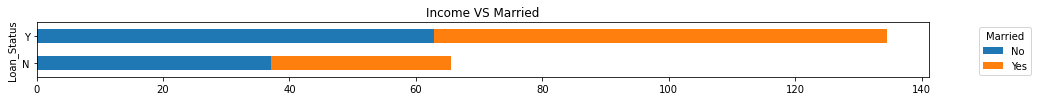

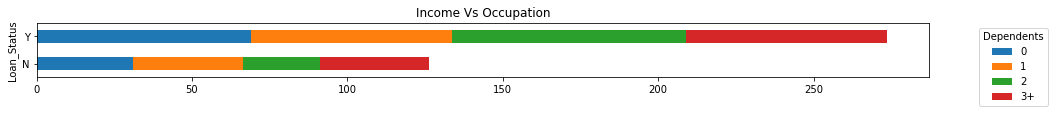

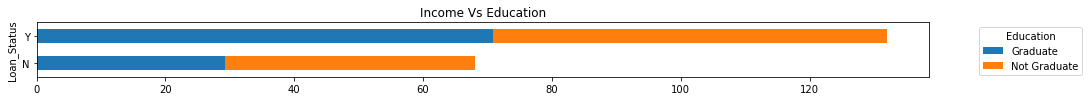

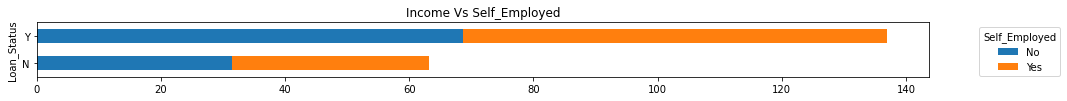

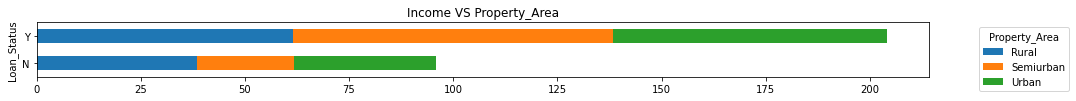

In [370]:
temp=pd.crosstab(df['Loan_Status'],df['Gender'],dropna = False,normalize = 'columns').round(3)*100
temp.plot(kind='barh', stacked=True, grid=False,title = 'Income Vs Gender', mark_right = True,figsize=(16,1))
plt.legend(title = 'Gender',bbox_to_anchor=(1.05, 1), loc='upper left')
temp=pd.crosstab(df['Loan_Status'],df['Married'],dropna = False,normalize = 'columns').round(3)*100
temp.plot(kind='barh', stacked=True, grid=False,title = 'Income VS Married', mark_right = True,figsize=(16,1))
plt.legend(title = 'Married',bbox_to_anchor=(1.05, 1), loc='upper left')
temp=pd.crosstab(df['Loan_Status'],df['Dependents'],dropna = False,normalize = 'columns').round(3)*100
temp.plot(kind='barh', stacked=True, grid=False,title = 'Income Vs Occupation', mark_right = True,figsize=(16,1))
plt.legend(title = 'Dependents',bbox_to_anchor=(1.05, 1), loc='upper left')
temp=pd.crosstab(df['Loan_Status'],df['Education'],dropna = False,normalize = 'columns').round(3)*100
temp.plot(kind='barh', stacked=True, grid=False,title = 'Income Vs Education', mark_right = True,figsize=(16,1))
plt.legend(title = 'Education',bbox_to_anchor=(1.05, 1), loc='upper left')
temp=pd.crosstab(df['Loan_Status'],df['Self_Employed'],dropna = False,normalize = 'columns').round(3)*100
temp.plot(kind='barh', stacked=True, grid=False,title = 'Income Vs Self_Employed', mark_right = True,figsize=(16,1))
plt.legend(title = 'Self_Employed',bbox_to_anchor=(1.05, 1), loc='upper left')
temp=pd.crosstab(df['Loan_Status'],df['Property_Area'],dropna = False,normalize = 'columns').round(3)*100
temp.plot(kind='barh', stacked=True, grid=False,title = 'Income VS Property_Area', mark_right = True,figsize=(16,1))
plt.legend(title = 'Property_Area',bbox_to_anchor=(1.05, 1), loc='upper left')

*Observation :*<br>*Male have more Loan_Status Yes than Female*
<br>*Married have more Loan than unmarried*
<br>*Dependents with 2 have more loan than others*
<br>*Not graduate have more Loan status Yes*
<br>*Self_Employed have more Loan*
<br>*Semiurban have less rejected loan status*

###### 3.Numerical Vs Numerical

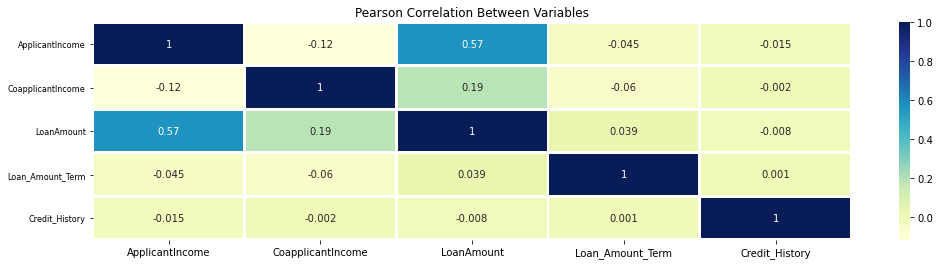

In [371]:
pcorrel = df.corr(method='pearson').round(3)
plt.figure(figsize=(17,4)) 
sns.heatmap(pcorrel,xticklabels=pcorrel.columns,yticklabels=pcorrel.columns,cmap="YlGnBu",annot=True,linewidth=1.9)
plt.title("Pearson Correlation Between Variables")
plt.xticks(fontsize=10)
plt.yticks(fontsize=8)
plt.show()   

###### Handling Outliers

In [372]:
fout =['ApplicantIncome','CoapplicantIncome','LoanAmount']
for f in fout:
    q1 = df[f].quantile(0.25)
    q3 = df[f].quantile(0.75)
    IQR = q3-q1
    lolimit = q1 - (IQR*1.5)
    uplimit = q3 + (IQR*1.5)
    df.loc[df[f]<lolimit,f] = lolimit
    df.loc[df[f]>uplimit,f] = uplimit

In [373]:
#Recheck for Outliers After Removing

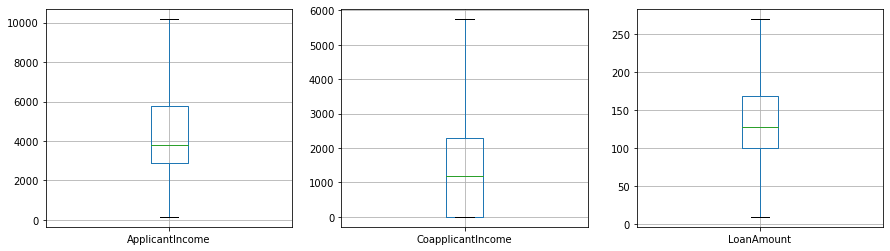

In [374]:
fig, pltcan=plt.subplots(nrows=1, ncols=len(fout), figsize=(15,4))
for predcol , i in zip(fout, range(len(fout))):
    df.boxplot(column=predcol, figsize=(2,10), ax=pltcan[i])
   
   

*Observation :*<br>*All Outliers removed*

###### Handling Missing/Zeros Values

In [375]:
#nan values before removing

In [376]:
for feature in df[['Gender','Married','Dependents','Education','Self_Employed','Property_Area','Loan_Status','Credit_History','Loan_Amount_Term']]:
    print(feature," : ", df[feature].unique())

Gender  :  ['Male' 'Female' nan]
Married  :  ['No' 'Yes' nan]
Dependents  :  ['0' '1' '2' '3+' nan]
Education  :  ['Graduate' 'Not Graduate']
Self_Employed  :  ['No' 'Yes' nan]
Property_Area  :  ['Urban' 'Rural' 'Semiurban']
Loan_Status  :  ['Y' 'N']
Credit_History  :  [ 1.  0. nan]
Loan_Amount_Term  :  [360. 120. 240.  nan 180.  60. 300. 480.  36.  84.  12.]


In [377]:
df.isnull().sum().sum()

149

In [378]:
#Removing nan values in Credit

In [379]:
df.Credit_History.median()
df['Credit_History'] = df['Credit_History'].replace(np.nan,1.0)

In [380]:
#removing null values

In [381]:
df=df.dropna(axis=0, how='any', thresh=None, subset=None, inplace=False)

In [382]:
#Recheck for nan/missing values

In [383]:
df.isnull().sum().sum()

0

In [384]:
df.shape

(523, 13)

*Observation :*<br>*All missing values and Zeros are removed*

###### Encoding Categorical Variables

In [385]:
#Unique values before Encoding

In [386]:
for feature in df[['Gender','Married','Dependents','Education','Self_Employed','Property_Area','Loan_Status']]:
    print(feature," : ", df[feature].unique())

Gender  :  ['Male' 'Female']
Married  :  ['Yes' 'No']
Dependents  :  ['1' '0' '2' '3+']
Education  :  ['Graduate' 'Not Graduate']
Self_Employed  :  ['No' 'Yes']
Property_Area  :  ['Rural' 'Urban' 'Semiurban']
Loan_Status  :  ['N' 'Y']


In [387]:
#Encoding categorical Variable

In [388]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['Gender']=le.fit_transform(df['Gender'])
df['Married']=le.fit_transform(df['Married'])
df['Dependents']=le.fit_transform(df['Dependents'])
df['Education']=le.fit_transform(df['Education'])
df['Self_Employed']=le.fit_transform(df['Self_Employed'])
df['Property_Area']=le.fit_transform(df['Property_Area'])
df['Loan_Status']=le.fit_transform(df['Loan_Status'])

#Recheck Encoded Column Unique Values 

In [389]:
for feature in df[['Gender','Married','Dependents','Education','Self_Employed','Property_Area','Loan_Status']]:
    print(feature," : ", df[feature].unique())

Gender  :  [1 0]
Married  :  [1 0]
Dependents  :  [1 0 2 3]
Education  :  [0 1]
Self_Employed  :  [0 1]
Property_Area  :  [0 2 1]
Loan_Status  :  [0 1]


*Observation :*<br>*Ctegorical fetures are converted into numerical*

###### Handling Cardinality

In [390]:
#droping Loan_ID column

In [391]:
df.drop('Loan_ID',inplace=True,axis=1)

In [392]:
#Recheck Cardinality

Text(0.5, 1.0, 'Cardinality')

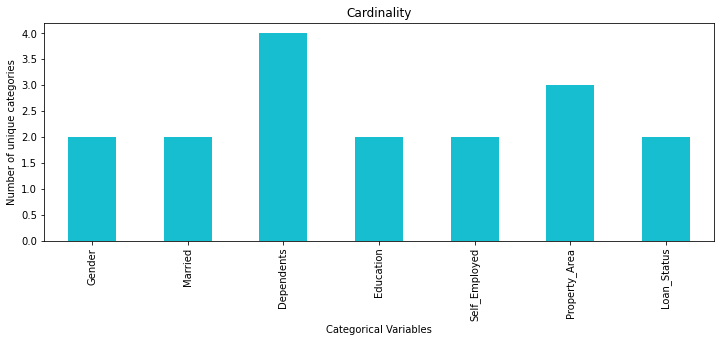

In [393]:
categorical_feature=['Gender','Married','Dependents','Education','Self_Employed','Property_Area','Loan_Status']
df[categorical_feature].nunique().plot.bar(figsize=(12,4),color='#17becf')
plt.ylabel('Number of unique categories')
plt.xlabel('Categorical Variables')
plt.title('Cardinality')

*Observation :*<br>*Cardinality is removed in categorical features*

###### Handling Skewness

In [394]:
#Skweness before removing

In [395]:
print(df[['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term']].skew())
#df.skew().plot(kind='barh',color='#9467bd')

ApplicantIncome      1.033473
CoapplicantIncome    1.025487
LoanAmount           0.688285
Loan_Amount_Term    -2.431222
dtype: float64


In [396]:
#Removing Skweness

In [397]:
df[['ApplicantIncome']]= np.sqrt(df[['ApplicantIncome']])
df[['CoapplicantIncome']]= np.sqrt(df[['CoapplicantIncome']])
df[['LoanAmount']]= np.sqrt(df[['LoanAmount']])
#df[['Loan_Amount_Term']]= np.sqrt(df[['Loan_Amount_Term']])


In [398]:
#Recheck for Skewness

In [399]:
print(df[['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term']].skew())
#df.skew().plot(kind='barh',color='#9467bd')

ApplicantIncome      0.590590
CoapplicantIncome    0.204997
LoanAmount           0.076574
Loan_Amount_Term    -2.431222
dtype: float64


In [400]:
df.shape

(523, 12)

In [401]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,1,1,1,0,0,67.697858,38.832976,11.313708,360.0,1.0,0,0
2,1,1,0,0,1,54.772256,0.000000,8.124038,360.0,1.0,2,1
3,1,1,0,1,0,50.823223,48.559242,10.954451,360.0,1.0,2,1
4,1,0,0,0,0,77.459667,0.000000,11.874342,360.0,1.0,2,1
5,1,1,2,0,1,73.600272,64.776539,16.340135,360.0,1.0,2,1


*Observation :*<br>*Skweness is removed*

###### Feature Selection

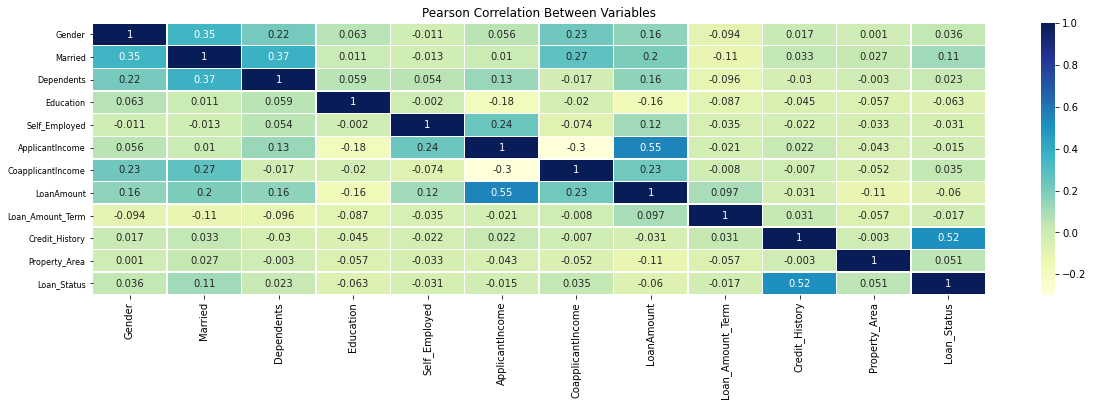

In [402]:
# Variable Correlation
pcorrel = df.corr(method='pearson').round(3)
plt.figure(figsize=(20,5)) 
sns.heatmap(pcorrel,xticklabels=pcorrel.columns,yticklabels=pcorrel.columns,cmap="YlGnBu",annot=True,linewidth=0.5)
plt.title("Pearson Correlation Between Variables")
plt.xticks(fontsize=10)
plt.yticks(fontsize=8)
plt.show()        
    

###### split target and feature variables

In [403]:
y_train=df[['Loan_Status']]
X_train=df.drop(['Loan_Status'],axis=1)

print("y_train :",y_train.shape)
print("X_train :",X_train.shape)

y_train : (523, 1)
X_train : (523, 11)


*Observation :*<br>*target and prediction features are seprated*

[0.02448524 0.02537622 0.06794287 0.02109017 0.02458164 0.18055268
 0.09919716 0.18530603 0.05488715 0.25594533 0.06063551]


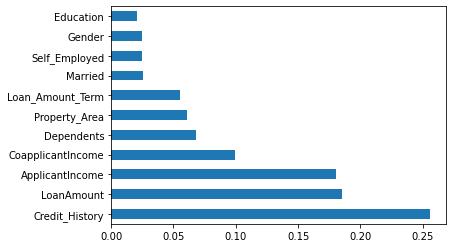

In [404]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(X_train,y_train)
print(model.feature_importances_) 
feat_importances = pd.Series(model.feature_importances_, index=X_train.columns)
feat_importances.nlargest(11).plot(kind='barh')
plt.show()

In [405]:
#droping features

In [406]:
X_train.drop(['Education','Self_Employed','Married','Loan_Amount_Term'],inplace=True,axis=1)

In [407]:
X_train.shape

(523, 7)

In [408]:
#selected features

In [409]:
X_train.columns

Index(['Gender', 'Dependents', 'ApplicantIncome', 'CoapplicantIncome',
       'LoanAmount', 'Credit_History', 'Property_Area'],
      dtype='object')

In [410]:
y_train.columns

Index(['Loan_Status'], dtype='object')

###### Normilization of data

In [411]:
from sklearn.preprocessing import power_transform
X=power_transform(X_train,method='yeo-johnson')
X

array([[ 0.47415647,  0.79857116,  0.19988111, ..., -0.06004595,
         0.39309717, -1.34844424],
       [ 0.47415647, -0.85008679, -0.59777291, ..., -1.35177616,
         0.39309717,  1.21769269],
       [ 0.47415647, -0.85008679, -0.86935868, ..., -0.20392308,
         0.39309717,  1.21769269],
       ...,
       [ 0.47415647,  0.79857116,  1.33427215, ...,  1.75030137,
         0.39309717,  1.21769269],
       [ 0.47415647,  1.28746358,  1.20503797, ...,  0.87693755,
         0.39309717,  1.21769269],
       [-2.10900846, -0.85008679,  0.19988111, ...,  0.02742216,
        -2.54390027,  0.02630573]])

###### Splitting Dataset into train and test set

In [230]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y_train, test_size = 0.25, random_state = 44)
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(392, 7)
(392, 1)
(131, 7)
(131, 1)


###### Sandardization of data

In [231]:

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
print(x_train)
x_test = sc.fit_transform(x_test)
print(x_test)

[[-2.10818511 -0.85437392 -1.16326729 ... -1.24198413  0.41249152
   0.0271109 ]
 [-2.10818511  0.7904069   0.22941839 ...  0.03941795  0.41249152
   1.20700518]
 [-2.10818511 -0.85437392 -1.18571652 ...  0.07277798 -2.42429226
   0.0271109 ]
 ...
 [-2.10818511 -0.85437392  1.78799372 ...  1.75674743  0.41249152
   1.20700518]
 [-2.10818511 -0.85437392 -0.44685398 ... -1.01187765  0.41249152
   1.20700518]
 [ 0.47434165 -0.85437392 -0.25784475 ... -0.2376651  -2.42429226
  -1.33437759]]
[[ 4.73602223e-01 -8.37366186e-01  1.48691394e+00 -1.14468587e+00
   5.85014396e-01  3.31917899e-01  2.38143525e-02]
 [ 4.73602223e-01  1.54518359e+00 -5.20478251e-01 -1.14468587e+00
  -1.19152625e+00  3.31917899e-01  2.38143525e-02]
 [ 4.73602223e-01  8.23458996e-01  1.93222517e+00 -1.14468587e+00
   2.20373166e+00  3.31917899e-01  1.25171653e+00]
 [ 4.73602223e-01  8.23458996e-01  1.33768204e+00 -1.14468587e+00
   1.80471779e+00  3.31917899e-01  1.25171653e+00]
 [-2.11147658e+00 -8.37366186e-01 -5.241

###### Model Building

In [259]:
models=[]
models1 = []
models2=[]

Z = [SVC(probability=True) , DecisionTreeClassifier() , LogisticRegression() , KNeighborsClassifier() ,
    RandomForestClassifier() , GradientBoostingClassifier(),AdaBoostClassifier()]
X = ["SVC" , "DecisionTreeClassifier" , "LogisticRegression" , "KNeighborsClassifier" ,
    "RandomForestClassifier" , "GradientBoostingClassifier","AdaBoostClassifier"]
for i in range(0,len(Z)):
    model = Z[i]
    model=model.fit( x_train , y_train )
    pred = model.predict(x_test)
    models.append(accuracy_score(pred , y_test))
    models1.append(model.score(x_train , y_train))


In [260]:
d = {"Training Accuracy":models1,"Testing Accuracy" : models}
data_frame = pd.DataFrame(d,index=X)
data_frame

,Training Accuracy,Testing Accuracy
SVC,0.808673,0.839695
DecisionTreeClassifier,1.000000,0.732824
LogisticRegression,0.798469,0.839695
KNeighborsClassifier,0.821429,0.824427
RandomForestClassifier,1.000000,0.809160
GradientBoostingClassifier,0.910714,0.809160
AdaBoostClassifier,0.834184,0.832061


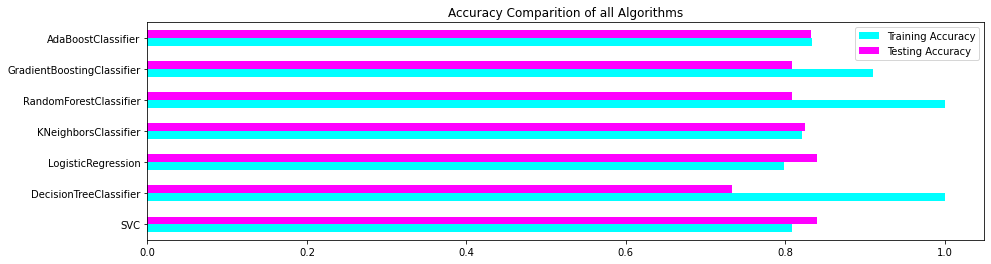

In [261]:
data_frame.plot(kind='barh',figsize=(15,4),title='Accuracy Comparition of all Algorithms',colormap='cool')
plt.show()

###### Evaluation

In [262]:
#Classification Report

In [263]:
models2=[]
models3=[]
for i in range(0,len(Z)):
    model = Z[i]
    model=model.fit( x_train , y_train )
    pred = model.predict(x_test)
    Class_Report=metrics.classification_report(y_test, pred)
    models2.append(Class_Report)
    print("Model Name :",model,"\n",Class_Report)
    f1sc=metrics.f1_score(y_test, pred, average='weighted')
    models3.append(f1sc)
    print("Testing Accuracy of Data with Model",model,":",round(f1sc,2),"\n")

Model Name : SVC(probability=True) 
               precision    recall  f1-score   support

           0       0.92      0.38      0.53        32
           1       0.83      0.99      0.90        99

    accuracy                           0.84       131
   macro avg       0.88      0.68      0.72       131
weighted avg       0.85      0.84      0.81       131

Testing Accuracy of Data with Model SVC(probability=True) : 0.81 

Model Name : DecisionTreeClassifier() 
               precision    recall  f1-score   support

           0       0.44      0.50      0.47        32
           1       0.83      0.80      0.81        99

    accuracy                           0.73       131
   macro avg       0.64      0.65      0.64       131
weighted avg       0.74      0.73      0.73       131

Testing Accuracy of Data with Model DecisionTreeClassifier() : 0.73 

Model Name : LogisticRegression() 
               precision    recall  f1-score   support

           0       0.92      0.38      0.

In [264]:
d2 = {"Accuracy of Testing Data" : models3}
data_frame2 = pd.DataFrame(d2,index=X)
data_frame2

,Accuracy of Testing Data
SVC,0.812870
DecisionTreeClassifier,0.730440
LogisticRegression,0.812870
KNeighborsClassifier,0.799616
RandomForestClassifier,0.794378
GradientBoostingClassifier,0.794378
AdaBoostClassifier,0.814095


In [265]:
# Confusion Matrix

In [266]:
cmodel=[]
for i in range(0,len(Z)):
    model = Z[i]
    model=model.fit( x_train , y_train )
    pred = model.predict(x_test)
    cm = np.array(confusion_matrix(y_test, pred, labels=[1,0]))
    cmodel.append(cm)
    

dc={"Confusion Matrix":cmodel}    
conf_mat=pd.DataFrame(dc,index=X)

conf_mat

,Confusion Matrix
SVC,"[[98, 1], [20, 12]]"
DecisionTreeClassifier,"[[79, 20], [15, 17]]"
LogisticRegression,"[[98, 1], [20, 12]]"
KNeighborsClassifier,"[[96, 3], [20, 12]]"
RandomForestClassifier,"[[94, 5], [17, 15]]"
GradientBoostingClassifier,"[[92, 7], [18, 14]]"
AdaBoostClassifier,"[[95, 4], [18, 14]]"


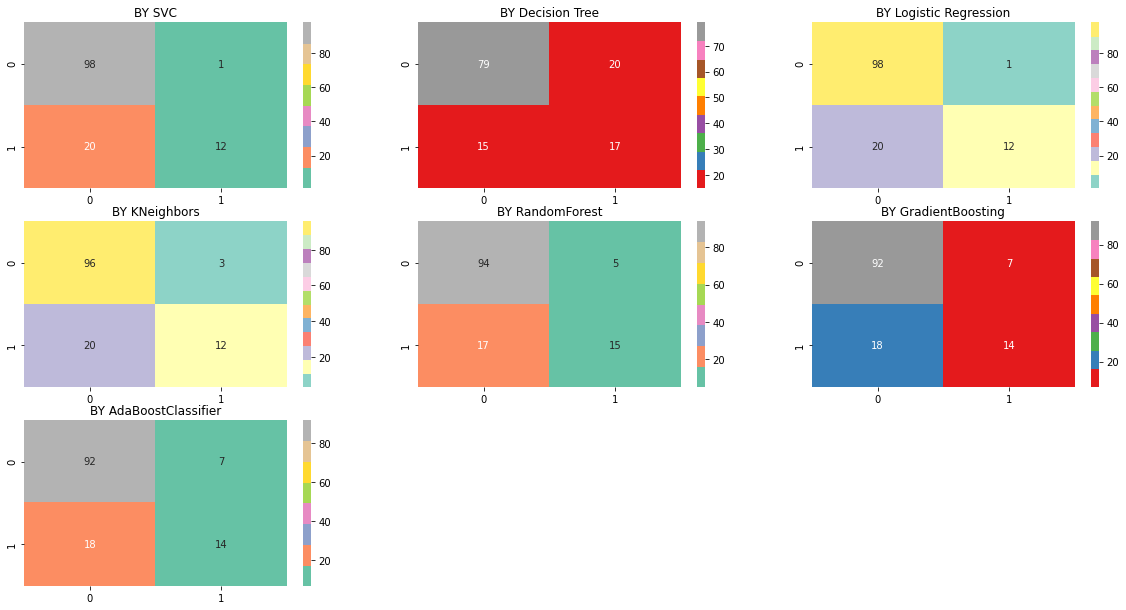

In [327]:
plt.figure(figsize=(20,25))
plt.subplot(7,3,1)
sns.heatmap(cmodel[0],annot=True,fmt='g',cmap='Set2')
plt.title("BY SVC")
plt.subplot(7,3,2)
sns.heatmap(cmodel[1],annot=True,fmt='g',cmap='Set1')
plt.title("BY Decision Tree")
plt.subplot(7,3,3)
sns.heatmap(cmodel[2],annot=True,fmt='g',cmap='Set3')
plt.title("BY Logistic Regression")
plt.subplot(7,3,4)
sns.heatmap(cmodel[3],annot=True,fmt='g',cmap='Set3')
plt.title("BY KNeighbors")  
plt.subplot(7,3,5)
sns.heatmap(cmodel[4],annot=True,fmt='g',cmap='Set2')
plt.title("BY RandomForest")
plt.subplot(7,3,6)
sns.heatmap(cmodel[5],annot=True,fmt='g',cmap='Set1')
plt.title("BY GradientBoosting")
plt.subplot(7,3,7)
sns.heatmap(cmodel[5],annot=True,fmt='g',cmap='Set2')
plt.title("BY AdaBoostClassifier")
plt.show()   


###### Validation

In [268]:
#Cross validation

In [269]:

vmodel=[]
acvalmodel=[]
for i in range(0,len(Z)):
    model = Z[i]
    model.fit( x_train , y_train )
    pred = model.predict(x_test)
    acval=cross_val_score(model,x_train , y_train, cv=10, scoring='f1_weighted')
    acvalmodel.append(acval)
    print('\n',model,' 10-fold Cross Validation:')
    print('Accuracy value :',acval)
    vmodel.append(round(acval.mean(),2))
    print('Final Average Accuracy :',round(acval.mean(),3))
    




 SVC(probability=True)  10-fold Cross Validation:
Accuracy value : [0.725      0.73151261 0.73496031 0.8603582  0.71648352 0.80450148
 0.8603582  0.80450148 0.76296296 0.7037037 ]
Final Average Accuracy : 0.77

 DecisionTreeClassifier()  10-fold Cross Validation:
Accuracy value : [0.62840671 0.78871473 0.64102564 0.70197802 0.52555723 0.70401338
 0.69230769 0.61051991 0.67532468 0.61873638]
Final Average Accuracy : 0.659

 LogisticRegression()  10-fold Cross Validation:
Accuracy value : [0.725      0.73151261 0.73496031 0.8603582  0.71648352 0.80450148
 0.8603582  0.80450148 0.76296296 0.7037037 ]
Final Average Accuracy : 0.77

 KNeighborsClassifier()  10-fold Cross Validation:
Accuracy value : [0.69285714 0.74646247 0.74864475 0.86601118 0.73496031 0.80450148
 0.76631195 0.78143236 0.72943723 0.69674185]
Final Average Accuracy : 0.757

 RandomForestClassifier()  10-fold Cross Validation:
Accuracy value : [0.71430206 0.76845878 0.72679045 0.83607427 0.69602978 0.73651349
 0.81241565 0

In [270]:
dv={"10 fold Cross Validation":acvalmodel,"Final Average Accuracy":vmodel}    
cross_val=pd.DataFrame(dv,index=X)
cross_val

,10 fold Cross Validation,Final Average Accuracy
SVC,"[0.725, 0.7315126050420168, 0.7349603145167273...",0.77
DecisionTreeClassifier,"[0.6284067085953878, 0.7887147335423198, 0.641...",0.66
LogisticRegression,"[0.725, 0.7315126050420168, 0.7349603145167273...",0.77
KNeighborsClassifier,"[0.6928571428571428, 0.7464624676445211, 0.748...",0.76
RandomForestClassifier,"[0.7143020594965674, 0.7684587813620072, 0.726...",0.75
GradientBoostingClassifier,"[0.65, 0.7684587813620072, 0.6760626066315556,...",0.74
AdaBoostClassifier,"[0.6830721003134796, 0.725, 0.726790450928382,...",0.74


In [271]:
#visualization of final Accuracy

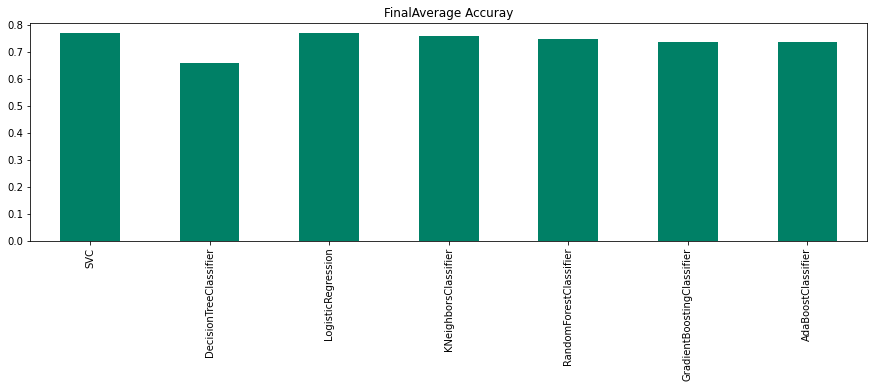

In [272]:
#cross_val['Final Average Accuracy'].plot(kind='bar')
cross_val['Final Average Accuracy'].plot(kind='bar',figsize=(15,4),title='FinalAverage Accuray',colormap='summer')
plt.show()

In [273]:
#AUC_ROC Curve

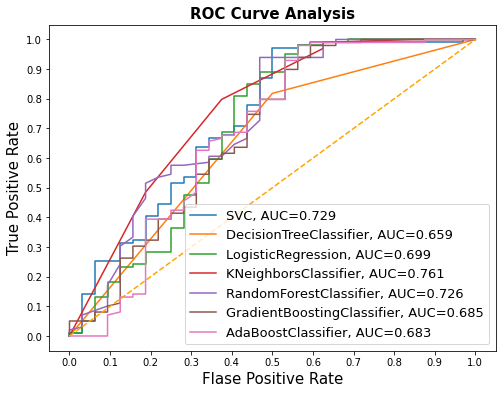

In [274]:
result_table = pd.DataFrame(columns=['Z', 'fpr','tpr','auc'])
for i in range(0,len(Z)):
    model = Z[i]
    model=model.fit( x_train , y_train )
    ypred = model.predict_proba(x_test)[::,1]
    fpr, tpr, _ = roc_curve(y_test,  ypred)
    auc = roc_auc_score(y_test, ypred)
    result_table = result_table.append({'model':model.__class__.__name__,'fpr':fpr,'tpr':tpr,'auc':auc},ignore_index=True)
result_table.set_index('model', inplace=True)

fig = plt.figure(figsize=(8,6))
for i in result_table.index:
    plt.plot(result_table.loc[i]['fpr'],result_table.loc[i]['tpr'],label="{}, AUC={:.3f}".format(i, result_table.loc[i]['auc']))
plt.plot([0,1], [0,1], color='orange', linestyle='--')
plt.xticks(np.arange(0.0, 1.1, step=0.1))
plt.xlabel("Flase Positive Rate", fontsize=15)
plt.yticks(np.arange(0.0, 1.1, step=0.1))
plt.ylabel("True Positive Rate", fontsize=15)
plt.title('ROC Curve Analysis', fontweight='bold', fontsize=15)
plt.legend(prop={'size':13}, loc='lower right')
plt.show()

###### Model Comparision

In [275]:
dfcomp=pd.concat([data_frame,cross_val],axis=1)
dfcomp[['Training Accuracy','Testing Accuracy','Final Average Accuracy']].head(6)

,Training Accuracy,Testing Accuracy,Final Average Accuracy
SVC,0.808673,0.839695,0.77
DecisionTreeClassifier,1.000000,0.732824,0.66
LogisticRegression,0.798469,0.839695,0.77
KNeighborsClassifier,0.821429,0.824427,0.76
RandomForestClassifier,1.000000,0.809160,0.75
GradientBoostingClassifier,0.910714,0.809160,0.74


<AxesSubplot:title={'center':'Accuracy Comparision'}>

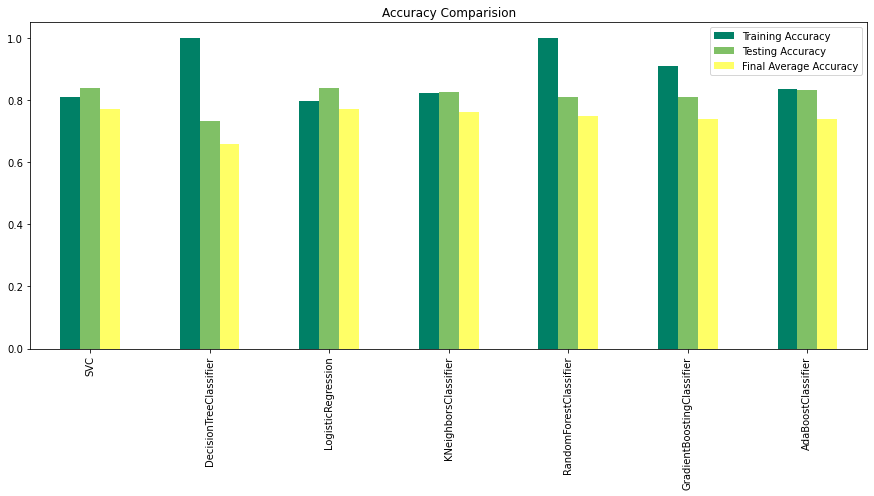

In [276]:
dfcomp[['Training Accuracy','Testing Accuracy','Final Average Accuracy']].plot(kind='bar',figsize=(15,6),title='Accuracy Comparision',colormap='summer')

###### Hyperparameter Tuning 

In [280]:
#for SVC Model

In [279]:
C=[0.1, 0.2, 0.3, 0.4, 0.5]
kernel=['linear', 'rbf']
gamma=[0.1,0.8,0.9,1,1.1,1.2,1.3,1.4]
degree=[1,2,4,8,10,20]
coef0=[1.5,3.4,5.6,9.2,10.2]
max_iter = [10, 50,5,90, 200, 110, 500, 1000]
verbose = [1,5,4,10,30,15,20,100]
class_weight = [{1:0.5, 0:0.5}, {1:0.4, 0:0.6}, {1:0.6, 0:0.4}, {1:0.7, 0:0.3}]
decision_function_shape=['ovo','ovr']
random_state= [1,5,10, 100,200,500]


param_distributions = dict(C=C,
                           kernel=kernel,
                           gamma=gamma,
                           degree=degree,
                           coef0=coef0,
                           max_iter=max_iter,
                           verbose=verbose,
                           class_weight=class_weight,
                           decision_function_shape=decision_function_shape,
                           random_state=random_state)

random = RandomizedSearchCV(estimator=SVC(probability=True),
                            param_distributions=param_distributions,
                            scoring='roc_auc',
                            verbose=1, n_jobs=-1,
                            n_iter=1000)
random_result = random.fit(x_train, y_train)

print('Best Score: ', random_result.best_score_)
print('Best Params: ', random_result.best_params_)

Fitting 5 folds for each of 1000 candidates, totalling 5000 fits
[LibSVM]Best Score:  0.7517034707663639
Best Params:  {'verbose': 15, 'random_state': 1, 'max_iter': 500, 'kernel': 'rbf', 'gamma': 0.1, 'degree': 20, 'decision_function_shape': 'ovo', 'coef0': 1.5, 'class_weight': {1: 0.5, 0: 0.5}, 'C': 0.5}


In [ ]:
# for LogisticRegression

In [281]:
penalty = ['l1', 'l2', 'elasticnet']
C=[0.1, 0.2, 0.3, 0.4, 0.5]
max_iter = [10, 50,5,90, 200, 110, 500, 1000]
solver=['newton-cg', 'liblinear', 'sag', 'saga']
verbose = [1,5,4,10,30,15,20,100]
class_weight = [{1:0.5, 0:0.5}, {1:0.4, 0:0.6}, {1:0.6, 0:0.4}, {1:0.7, 0:0.3}]
multi_class=['ovr', 'multinomial']
n_jobs= [1,5,10, 100,200,500]


param_distributions = dict(penalty=penalty,
                           C=C,
                           max_iter=max_iter,
                           solver=solver,
                           verbose=verbose,
                           class_weight=class_weight,
                           multi_class=multi_class,
                           n_jobs=n_jobs)

random = RandomizedSearchCV(estimator=LogisticRegression(),
                            param_distributions=param_distributions,
                            scoring='roc_auc',
                            verbose=1, n_jobs=-1,
                            n_iter=1000)
random_result = random.fit(x_train, y_train)

print('Best Score: ', random_result.best_score_)
print('Best Params: ', random_result.best_params_)

Fitting 5 folds for each of 1000 candidates, totalling 5000 fits
max_iter reached after 0 seconds
Best Score:  0.7191149545772187
Best Params:  {'verbose': 20, 'solver': 'sag', 'penalty': 'l2', 'n_jobs': 100, 'multi_class': 'multinomial', 'max_iter': 5, 'class_weight': {1: 0.7, 0: 0.3}, 'C': 0.5}


[Parallel(n_jobs=100)]: Using backend ThreadingBackend with 100 concurrent workers.
[Parallel(n_jobs=100)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=100)]: Done   1 out of   1 | elapsed:    0.0s finished


###### Final Model

*Choosing the SVC as Final Model*
<br>*SVC Test Accuray is higher than Train Accuracy and its Accuracy is higher than all*
<br>*final Accuracy is also higher than other models*
<br>*Best Score after Hyperparameter tuning is also high*

###### Retraining the Model

In [ ]:
#Full Dataset

In [306]:
y_train=df[['Loan_Status']]
X_train=df.drop(['Loan_Status'],axis=1)


In [308]:
PScaler=StandardScaler()
PScalerFit=PScaler.fit(X_train)

x_train=PScalerFit.transform(X_train)

print("x_train :",x_train.shape)
print("y_train :",y_train.shape)


x_train : (523, 11)
y_train : (523, 1)


In [315]:
clf =SVC(verbose=15,random_state=1,max_iter=500,kernel='rbf',gamma=0.1,degree=20,decision_function_shape='ovo',coef0=1.5,class_weight={1: 0.5, 0: 0.5},C=0.5)

finalSVC=clf.fit(x_train,y_train)
print("Accuracy :", finalSVC.score(x_train, y_train))

paccval=cross_val_score(finalSVC, x_train , y_train, cv=5, scoring='f1_weighted')
print('\n\nCross Validation')
print('Accuracy values:',paccval)

print('\nFinal Average Accuracy of the model:', round(paccval.mean(),2))

[LibSVM]Accuracy : 0.8107074569789675
[LibSVM][LibSVM][LibSVM][LibSVM][LibSVM]

Cross Validation
Accuracy values: [0.74123646 0.75306122 0.73061224 0.80536975 0.79232604]

Final Average Accuracy of the model: 0.76


###### Model Saving

In [328]:
import pickle
filename='LoanStatus.pk1'
pickle.dump(SVC,open(filename,'wb'))
print("Model Saved")

Model Saved
